,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

None

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
count,1275,1275,1275,1275.000000,1275,1275,1275,1275.000000,1275.000000,1275,1275,1275,1275,1275.000000,1275.000000
unique,19,618,6,NaN,40,3,93,NaN,NaN,39,4,106,9,NaN,NaN
top,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel,Core i5 7200U,NaN,NaN,256GB SSD,Intel,HD Graphics 620,Windows 10,NaN,NaN
freq,291,30,707,NaN,505,1214,193,NaN,NaN,412,704,280,1048,NaN,NaN
mean,NaN,NaN,NaN,15.022902,NaN,NaN,NaN,2.302980,8.440784,NaN,NaN,NaN,NaN,2.040525,1134.969059
std,NaN,NaN,NaN,1.429470,NaN,NaN,NaN,0.503846,5.097809,NaN,NaN,NaN,NaN,0.669196,700.752504
min,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,0.900000,2.000000,NaN,NaN,NaN,NaN,0.690000,174.000000
25%,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,NaN,NaN,1.500000,609.000000
50%,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,2.500000,8.000000,NaN,NaN,NaN,NaN,2.040000,989.000000
75%,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,2.700000,8.000000,NaN,NaN,NaN,NaN,2.310000,1496.500000



--- Basic Dataset Information ---
Number of rows and columns: (1275, 15)

Column names: ['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory', 'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)']

Missing values per column:
Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

Price statistics:
count    1275.000000
mean     1134.969059
std       700.752504
min       174.000000
25%       609.000000
50%       989.000000
75%      1496.500000
max      6099.000000
Name: Price (Euro), dtype: float64


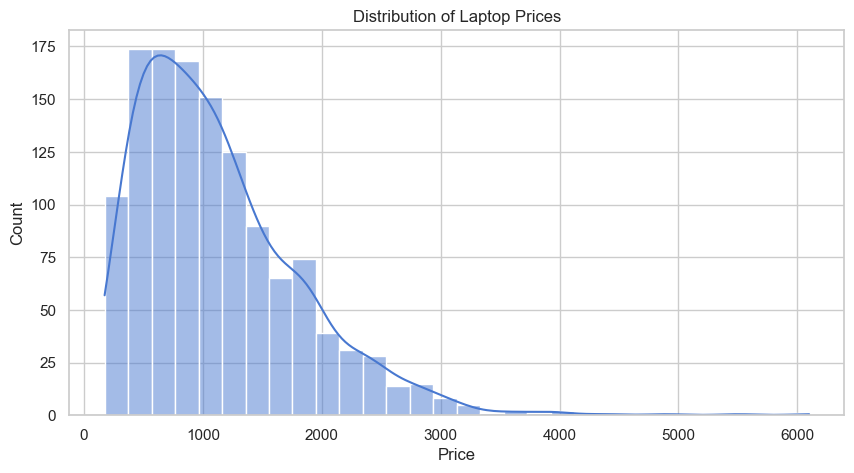


--- Average Price per Company ---


Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64

/var/folders/zz/69cs86j13ks_03fpp0m2k9nc0000gn/T/ipykernel_92468/4054514799.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_company.values, y=avg_price_by_company.index, palette="viridis")


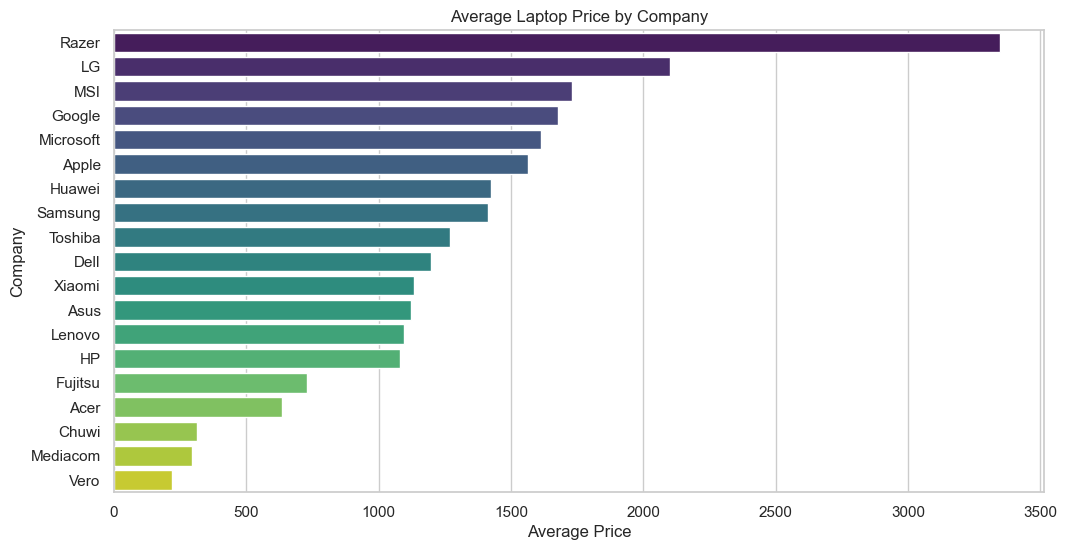


--- Operating System Counts (Cleaned) ---


OpSys_clean
Windows      1101
Other          68
Linux          58
Chrome OS      27
macOS          21
Name: count, dtype: int64

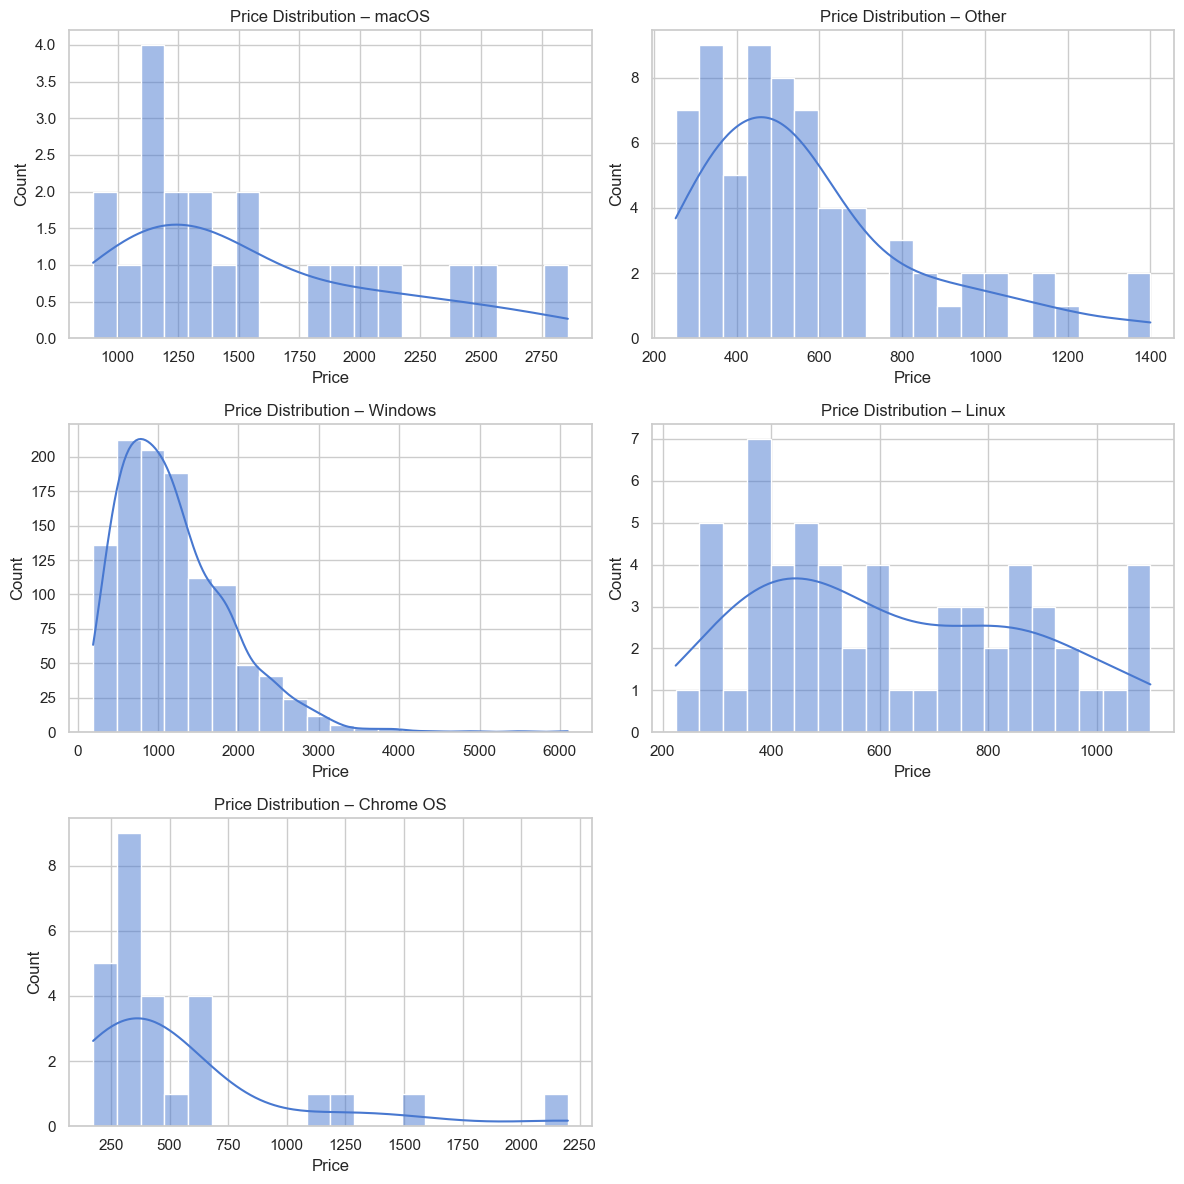

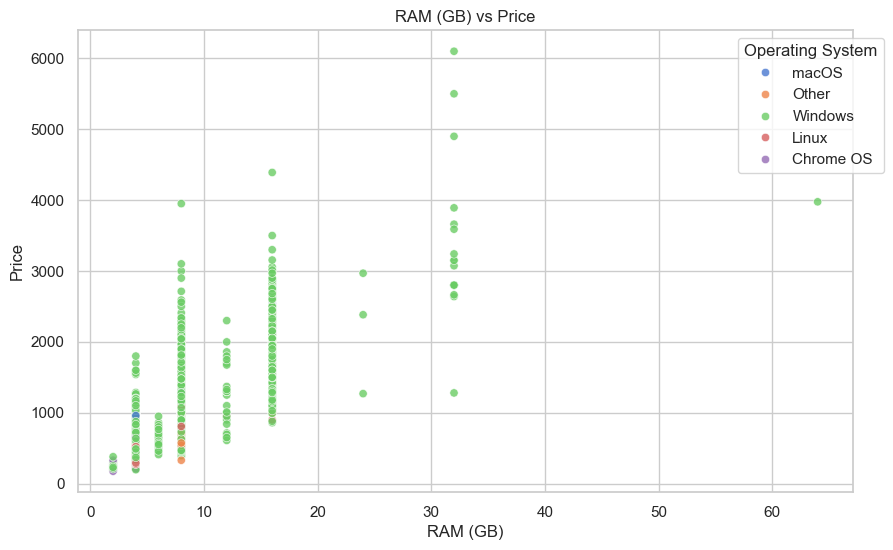

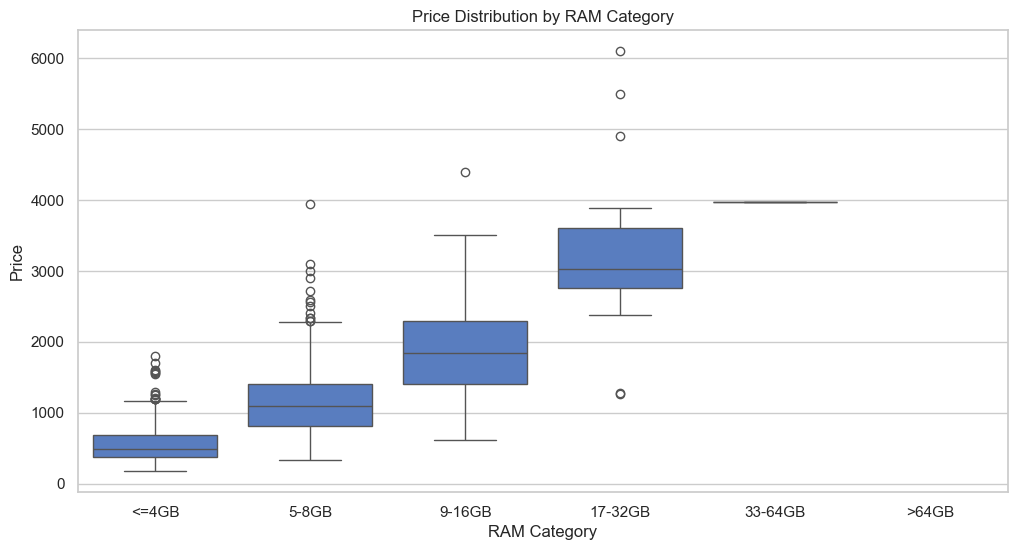


--- Storage Type Counts ---


Storage_type
SSD       837
HDD       360
Flash      70
Hybrid      8
Name: count, dtype: int64


--- Average Price by Storage Type ---


Storage_type
SSD       1391.896547
Hybrid     875.935000
HDD        662.108444
Flash      524.308857
Name: Price (Euro), dtype: float64

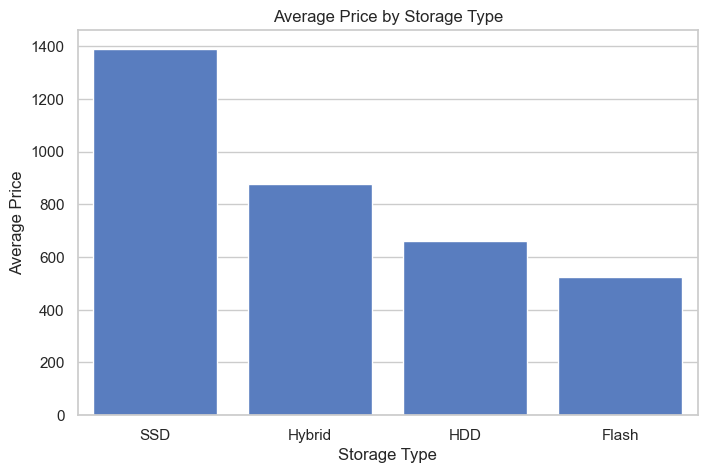


--- Outliers (IQR Method) ---
Lower bound: -722.25
Upper bound: 2827.75
Number of outliers: 28


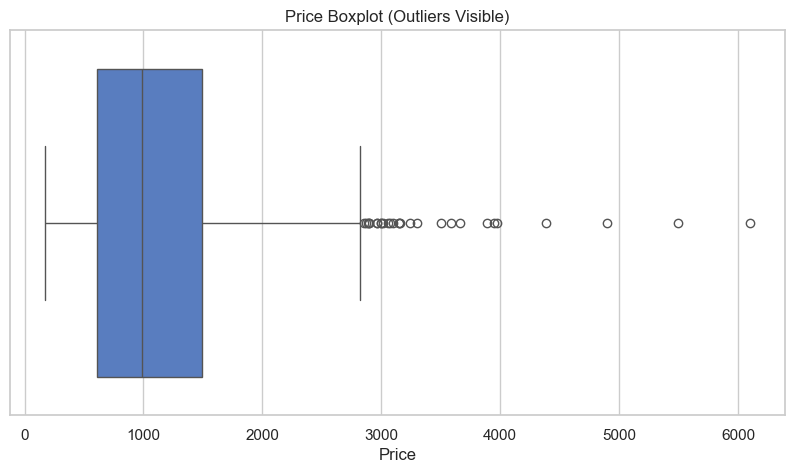


--- Outliers (Z-score > 3) ---
Number of outliers: 12


In [ ]:
# Notebook: Neuroscience Data Analysis with Python Workshop – MiniProject #1
# Eden Elkoubi 332548593

# Laptop Dataset – Full Statistical Analysis

# This notebook performs:
# - Basic statistics
# - Price distribution analysis
# - Company-level price comparison
# - Operating system normalization + plots
# - RAM vs Price analysis
# - Storage type extraction + analysis
# - Outlier detection (IQR + Z-score)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats

# Visualization settings
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Load dataset

df = pd.read_csv("laptop_price - dataset.csv")

# Preview the data
display(df.head())
display(df.info())
display(df.describe(include='all'))

# Identify price column
price_col = [c for c in df.columns if "price" in c.lower()][0]

# 2. Basic Statistics

print("\n--- Basic Dataset Information ---")
print("Number of rows and columns:", df.shape)
print("\nColumn names:", df.columns.tolist())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nPrice statistics:")
print(df[price_col].describe())

# 3. Price Distribution

plt.figure(figsize=(10,5))
sns.histplot(df[price_col], bins=30, kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# 4. Average Price per Company

company_col = "Company"

avg_price_by_company = df.groupby(company_col)[price_col].mean().sort_values(ascending=False)

print("\n--- Average Price per Company ---")
display(avg_price_by_company)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_by_company.values, y=avg_price_by_company.index, palette="viridis")
plt.title("Average Laptop Price by Company")
plt.xlabel("Average Price")
plt.ylabel("Company")
plt.show()

# 5. Operating System Normalization

opsys_col = "OpSys"

def normalize_os(x):
    x = str(x).lower()
    if "windows" in x:
        return "Windows"
    if "mac" in x:
        return "macOS"
    if "linux" in x:
        return "Linux"
    if "chrome" in x:
        return "Chrome OS"
    if "dos" in x:
        return "DOS"
    return "Other"

df["OpSys_clean"] = df[opsys_col].apply(normalize_os)

print("\n--- Operating System Counts (Cleaned) ---")
display(df["OpSys_clean"].value_counts())

# Plot price distribution per OS
unique_os = df["OpSys_clean"].unique()
rows = int(np.ceil(len(unique_os) / 2))

plt.figure(figsize=(12, 4 * rows))
for i, os_name in enumerate(unique_os):
    plt.subplot(rows, 2, i+1)
    sns.histplot(df[df["OpSys_clean"] == os_name][price_col], bins=20, kde=True)
    plt.title(f"Price Distribution – {os_name}")
    plt.xlabel("Price")
plt.tight_layout()
plt.show()

# 6. RAM vs Price Analysis

ram_col = [c for c in df.columns if "ram" in c.lower()][0]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=ram_col, y=price_col, hue="OpSys_clean", alpha=0.8)
plt.title("RAM (GB) vs Price")
plt.xlabel("RAM (GB)")
plt.ylabel("Price")
plt.legend(title="Operating System", bbox_to_anchor=(1.05, 1))
plt.show()

# RAM categories
df["RAM_cat"] = pd.cut(
    df[ram_col],
    bins=[-1,4,8,16,32,64,1000],
    labels=["<=4GB","5-8GB","9-16GB","17-32GB","33-64GB",">64GB"]
)

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="RAM_cat", y=price_col)
plt.title("Price Distribution by RAM Category")
plt.xlabel("RAM Category")
plt.ylabel("Price")
plt.show()

# 7. Storage Type Extraction

mem_col = "Memory"

def extract_storage(x):
    x = str(x).lower()
    if "ssd" in x:
        return "SSD"
    if "hdd" in x:
        return "HDD"
    if "flash" in x:
        return "Flash"
    if "emmc" in x:
        return "eMMC"
    if "hybrid" in x or "sshd" in x:
        return "Hybrid"
    return "Unknown"

df["Storage_type"] = df[mem_col].apply(extract_storage)

print("\n--- Storage Type Counts ---")
display(df["Storage_type"].value_counts())

avg_storage_price = df.groupby("Storage_type")[price_col].mean().sort_values(ascending=False)

print("\n--- Average Price by Storage Type ---")
display(avg_storage_price)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_storage_price.index, y=avg_storage_price.values)
plt.title("Average Price by Storage Type")
plt.xlabel("Storage Type")
plt.ylabel("Average Price")
plt.show()

# 8. Outlier Detection

# IQR method
Q1 = df[price_col].quantile(0.25)
Q3 = df[price_col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_iqr = df[(df[price_col] < lower) | (df[price_col] > upper)]

print("\n--- Outliers (IQR Method) ---")
print("Lower bound:", lower)
print("Upper bound:", upper)
print("Number of outliers:", len(outliers_iqr))

# Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x=df[price_col])
plt.title("Price Boxplot (Outliers Visible)")
plt.xlabel("Price")
plt.show()

# Z-score method
z_scores = np.abs(stats.zscore(df[price_col]))
outliers_z = df[z_scores > 3]

print("\n--- Outliers (Z-score > 3) ---")
print("Number of outliers:", len(outliers_z))



In [9]:
import os
print(os.getcwd())
print(os.listdir())



/
['home', 'usr', '.resolve', 'bin', 'sbin', '.file', 'etc', 'var', 'Library', 'System', '.VolumeIcon.icns', 'private', '.vol', 'Users', 'Applications', 'opt', 'dev', 'Volumes', '.nofollow', 'tmp', 'cores']
